# DATA 602 Classification Project

## References:

    https://github.com/appliedecon/data602-lectures/blob/main/regression/linear-regression-and-regularization.ipynb
    
    https://github.com/appliedecon/data602-lectures/blob/main/logistic-regression/logistic-regression.ipynb
    
    https://github.com/appliedecon/data602-lectures/blob/main/trees/trees.ipynb
    
    https://github.com/appliedecon/data602-lectures/blob/main/supervised-algorithms/knn-nb-svm.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

#read csv file
df = pd.read_csv('data.csv',delimiter=None, quotechar="'")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 100 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           64535 non-null  int64  
 1   CONTROL              64535 non-null  int64  
 2   AGE1                 64535 non-null  int64  
 3   METRO3               64535 non-null  int64  
 4   REGION               64535 non-null  int64  
 5   LMED                 64535 non-null  int64  
 6   FMR                  64535 non-null  int64  
 7   L30                  64535 non-null  int64  
 8   L50                  64535 non-null  int64  
 9   L80                  64535 non-null  int64  
 10  IPOV                 64535 non-null  int64  
 11  BEDRMS               64535 non-null  int64  
 12  BUILT                64535 non-null  int64  
 13  STATUS               64535 non-null  int64  
 14  TYPE                 64535 non-null  int64  
 15  VALUE                64535 non-null

Data wrangling to remove outliers, fill missing values
We used quotechar to remove the single quotes from the data 
Remove all duplicate columns with formatted data (starts with 'FMT')

In [5]:
#Remove all columns starting with 'FMT'
df = df.drop(df.filter(regex='FMT').columns, axis=1)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        64535 non-null  int64  
 1   CONTROL           64535 non-null  int64  
 2   AGE1              64535 non-null  int64  
 3   METRO3            64535 non-null  int64  
 4   REGION            64535 non-null  int64  
 5   LMED              64535 non-null  int64  
 6   FMR               64535 non-null  int64  
 7   L30               64535 non-null  int64  
 8   L50               64535 non-null  int64  
 9   L80               64535 non-null  int64  
 10  IPOV              64535 non-null  int64  
 11  BEDRMS            64535 non-null  int64  
 12  BUILT             64535 non-null  int64  
 13  STATUS            64535 non-null  int64  
 14  TYPE              64535 non-null  int64  
 15  VALUE             64535 non-null  int64  
 16  VACANCY           64535 non-null  int64 

In [7]:
# Data cleaning
# Remove missing values and negative values for AGE and home value
#Use fillna method for ZINC2
df.loc[df.VALUE < 25000 ] =np.nan
df.loc[df.VALUE > 600000 ] =np.nan
df.loc[df.AGE1 <5]=np.nan
df.loc[df.ZINC2 < 1000] =np.nan
df.ZINC2 = df.ZINC2.fillna(method='ffill').fillna(method ='bfill')

df=df[df['VALUE'].notnull()]
df=df[df['AGE1'].notnull()]



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31595 entries, 0 to 64521
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        31595 non-null  float64
 1   CONTROL           31595 non-null  float64
 2   AGE1              31595 non-null  float64
 3   METRO3            31595 non-null  float64
 4   REGION            31595 non-null  float64
 5   LMED              31595 non-null  float64
 6   FMR               31595 non-null  float64
 7   L30               31595 non-null  float64
 8   L50               31595 non-null  float64
 9   L80               31595 non-null  float64
 10  IPOV              31595 non-null  float64
 11  BEDRMS            31595 non-null  float64
 12  BUILT             31595 non-null  float64
 13  STATUS            31595 non-null  float64
 14  TYPE              31595 non-null  float64
 15  VALUE             31595 non-null  float64
 16  VACANCY           31595 non-null  float6

In [9]:
#Check if there are any null values
df.isnull().sum()

Unnamed: 0          0
CONTROL             0
AGE1                0
METRO3              0
REGION              0
                   ..
COSTMedRELAMICAT    0
COSTMedRELPOVPCT    0
COSTMedRELPOVCAT    0
COSTMedRELFMRPCT    0
COSTMedRELFMRCAT    0
Length: 75, dtype: int64

EDA --Exploratory Data Analyis

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


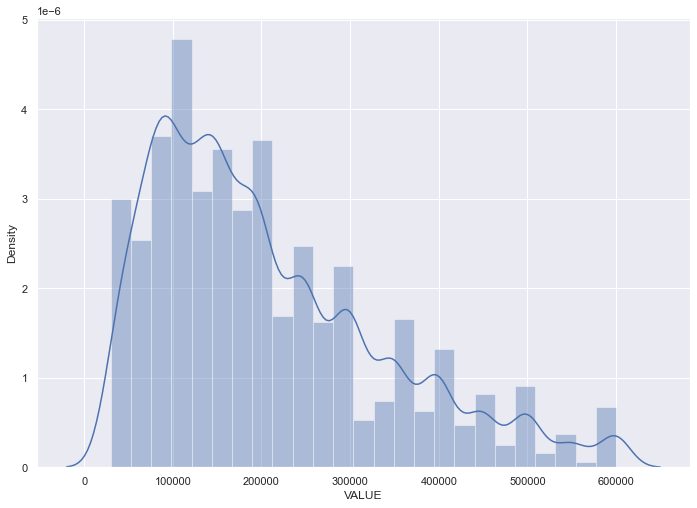

count     31595.00
mean     206751.07
std      131449.69
min       30000.00
25%      100000.00
50%      180000.00
75%      280000.00
max      600000.00
Name: VALUE, dtype: float64

In [10]:
# Value of the house--log scale used for better visualization of the distribution

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['VALUE'], bins=25)
plt.show()
df.VALUE.describe().round(2)

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


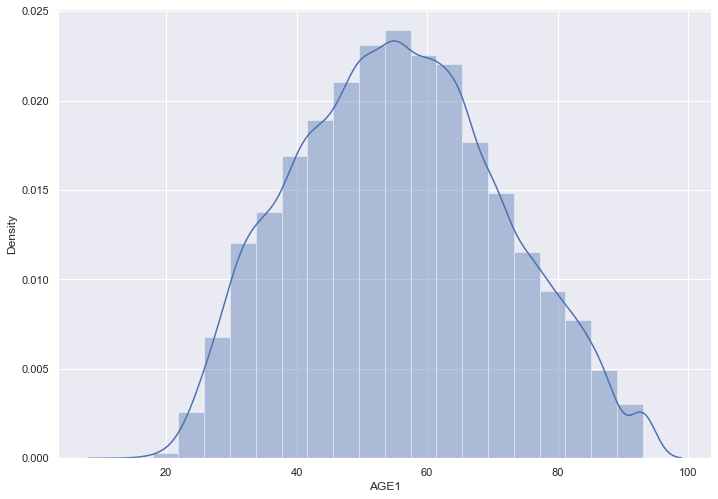

count    31595.00
mean        55.71
std         15.76
min         14.00
25%         44.00
50%         55.00
75%         67.00
max         93.00
Name: AGE1, dtype: float64

In [11]:
#Histogram of head of household age

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['AGE1'], bins=20)
plt.show()
df.AGE1.describe().round(2)

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


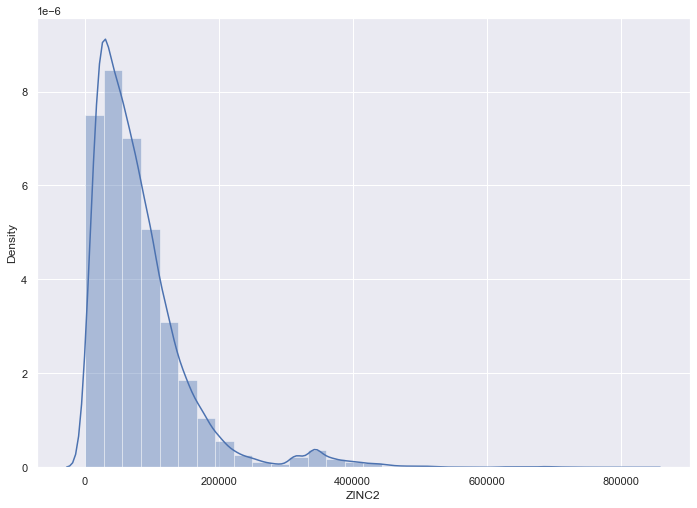

count     31595.00
mean      82133.84
std       74060.81
min        1000.00
25%       33650.00
50%       63987.00
75%      104987.00
max      831203.00
Name: ZINC2, dtype: float64

In [12]:
#Household income --log scale used to study the distribution
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['ZINC2'], bins=30)
plt.show()
df.ZINC2.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
METRO3,,,,,,,,
1.0,7095.0,200049.33,135983.55,30000.0,100000.0,160000.0,280000.0,600000.0
2.0,13343.0,232889.90,136486.63,30000.0,130000.0,200000.0,320000.0,600000.0
3.0,4784.0,210006.27,123674.41,30000.0,120000.0,180000.0,280000.0,600000.0
4.0,1970.0,150685.28,96539.34,30000.0,80000.0,130000.0,200000.0,600000.0
5.0,4403.0,159886.44,105864.76,30000.0,80000.0,130000.0,200000.0,600000.0


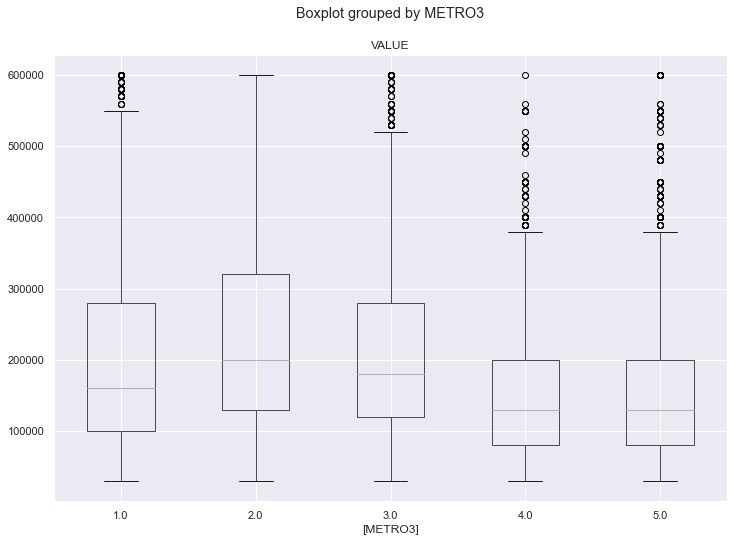

In [13]:
# Boxplot of Value based on METRO data. 1=Central City, 2-5=subarban areas (2=closer to cenral city)
# Univariate analysis of the Response data - bar plot
df.boxplot(column=['VALUE'],by = ['METRO3'])
df.VALUE.groupby(df.METRO3).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
1.0,7728.0,262255.43,139491.39,30000.0,150000.0,250000.0,350000.0,600000.0
2.0,9457.0,167287.72,107528.93,30000.0,90000.0,140000.0,210000.0,600000.0
3.0,9701.0,176431.30,115719.47,30000.0,90000.0,150000.0,230000.0,600000.0
4.0,4709.0,257377.36,143399.16,30000.0,150000.0,230000.0,350000.0,600000.0


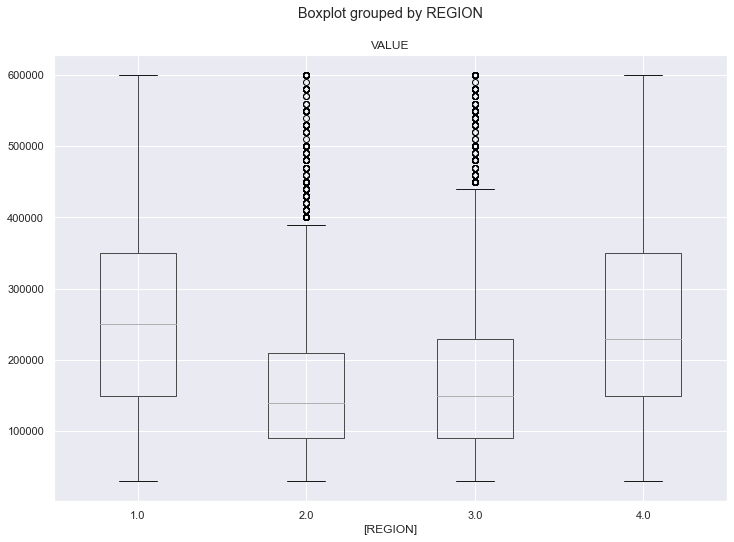

In [14]:
# Boxplot of Value based on REGION data (1=North East, 2=Mid West, 3=South, 4=West)
# Univariate analysis of the Response data - bar plot
df.boxplot(column=['VALUE'],by = ['REGION'])
df.VALUE.groupby(df.REGION).describe().round(2)

Dimension reduction using feature selection

In [15]:
# Correlation matrix
# Remove dependent variable and all the nan variable
df1 =df.loc[:,'AGE1':'BURDEN']
df1=df1.drop(['VALUE','STATUS', 'VACANCY', 'TENURE', 'OWNRENT', 'ASSISTED'], axis=1)
df1.corr().round(2)

,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,...,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,ABL80,ABLMED,BURDEN
AGE1,1.00,0.05,-0.02,-0.02,-0.06,-0.26,-0.26,-0.29,-0.43,-0.11,...,-0.02,-0.26,-0.26,-0.29,-0.26,-0.06,-0.06,-0.07,-0.07,0.07
METRO3,0.05,1.00,0.08,-0.43,-0.39,-0.35,-0.35,-0.36,-0.05,0.00,...,-0.43,-0.35,-0.35,-0.36,-0.33,-0.38,-0.38,-0.41,-0.36,-0.04
REGION,-0.02,0.08,1.00,-0.42,-0.04,-0.28,-0.28,-0.25,-0.00,0.03,...,-0.42,-0.28,-0.28,-0.25,-0.31,-0.32,-0.32,-0.29,-0.34,-0.02
LMED,-0.02,-0.43,-0.42,1.00,0.64,0.71,0.71,0.62,0.06,0.03,...,1.00,0.71,0.71,0.62,0.76,0.82,0.82,0.73,0.86,0.05
FMR,-0.06,-0.39,-0.04,0.64,1.00,0.68,0.68,0.64,0.23,0.46,...,0.64,0.68,0.68,0.64,0.62,0.88,0.88,0.86,0.79,0.04
L30,-0.26,-0.35,-0.28,0.71,0.68,1.00,1.00,0.98,0.68,0.23,...,0.71,1.00,1.00,0.98,0.97,0.76,0.76,0.73,0.72,-0.01
L50,-0.26,-0.35,-0.28,0.71,0.68,1.00,1.00,0.98,0.68,0.23,...,0.71,1.00,1.00,0.98,0.97,0.76,0.76,0.73,0.72,-0.01
L80,-0.29,-0.36,-0.25,0.62,0.64,0.98,0.98,1.00,0.75,0.25,...,0.62,0.98,0.98,1.00,0.94,0.70,0.70,0.71,0.65,-0.01
IPOV,-0.43,-0.05,-0.00,0.06,0.23,0.68,0.68,0.75,1.00,0.35,...,0.06,0.68,0.68,0.75,0.67,0.23,0.23,0.26,0.22,-0.06
BEDRMS,-0.11,0.00,0.03,0.03,0.46,0.23,0.23,0.25,0.35,1.00,...,0.03,0.23,0.23,0.25,0.26,0.52,0.52,0.59,0.53,-0.02


The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation

In [16]:
#Drop variables with high correlation
df2 =df1.drop(['L30','L50', 'L80',  'COST06', 'COST08','COST12', 'GL30','GL50', 'GL80', 'ABL30',
              'ABL50','ABL80','TOTSAL', 'APLMED','ABLMED','GLMED','COSTMED', 'PER','TYPE'], axis=1)


<AxesSubplot:>

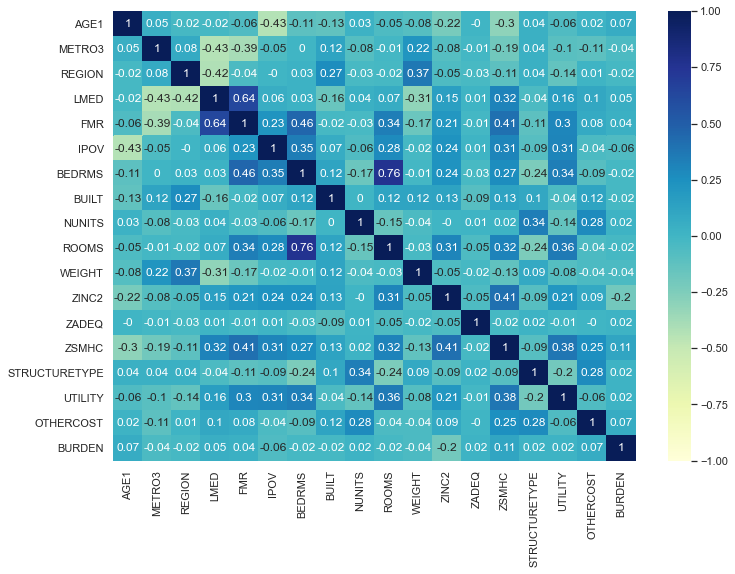

In [17]:
#Correlation matrix to check for correlation between variables

correlation_matrix = df2.corr().round(2)

# annot = True to print the values inside the square

sns.heatmap(data=correlation_matrix, annot=True, vmin= -1, vmax =1, center=0.0, cmap="YlGnBu")

## Classification:

### Logistic Regression:

In [18]:
df.columns

Index(['Unnamed: 0', 'CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR',
       'L30', 'L50', 'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'TYPE',
       'VALUE', 'VACANCY', 'TENURE', 'NUNITS', 'ROOMS', 'WEIGHT', 'PER',
       'ZINC2', 'ZADEQ', 'ZSMHC', 'STRUCTURETYPE', 'OWNRENT', 'UTILITY',
       'OTHERCOST', 'COST06', 'COST12', 'COST08', 'COSTMED', 'TOTSAL',
       'ASSISTED', 'GLMED', 'GL30', 'GL50', 'GL80', 'APLMED', 'ABL30', 'ABL50',
       'ABL80', 'ABLMED', 'BURDEN', 'INCRELAMIPCT', 'INCRELAMICAT',
       'INCRELPOVPCT', 'INCRELPOVCAT', 'INCRELFMRPCT', 'INCRELFMRCAT',
       'COST06RELAMIPCT', 'COST06RELAMICAT', 'COST06RELPOVPCT',
       'COST06RELPOVCAT', 'COST06RELFMRPCT', 'COST06RELFMRCAT',
       'COST08RELAMIPCT', 'COST08RELAMICAT', 'COST08RELPOVPCT',
       'COST08RELPOVCAT', 'COST08RELFMRPCT', 'COST08RELFMRCAT',
       'COST12RELAMIPCT', 'COST12RELAMICAT', 'COST12RELPOVPCT',
       'COST12RELPOVCAT', 'COST12RELFMRPCT', 'COST12RELFMRCAT',
       'COSTMedRELAMIPCT', 'COST

In [20]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [21]:
df.head()

,Unnamed: 0,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,ABL80,ABLMED,BURDEN,INCRELAMIPCT,INCRELAMICAT,INCRELPOVPCT,INCRELPOVCAT,INCRELFMRPCT,INCRELFMRCAT,COST06RELAMIPCT,COST06RELAMICAT,COST06RELPOVPCT,COST06RELPOVCAT,COST06RELFMRPCT,COST06RELFMRCAT,COST08RELAMIPCT,COST08RELAMICAT,COST08RELPOVPCT,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT
0,0.0,1.000031e+11,82.0,3.0,1.0,73738.0,956.0,15738.0,26213.0,40322.0,11067.0,2.0,2006.0,1.0,1.0,40000.0,-6.0,1.0,1.0,6.0,3117.394239,1.0,18021.0,1.0,533.0,1.0,1.0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0.0,-9.0,73738.0,15738.0,26213.0,40322.0,51616.6,20234.571429,33702.428571,51842.571429,66364.20,0.354919,34.913187,2.0,162.835457,3.0,47.126046,1.0,39.092655,2.0,234.422405,4.0,67.843953,2.0,42.004891,2.0,251.885876,4.0,72.898038,2.0,48.402635,2.0,290.250487,4.0,84.001102,2.0,37.077624,2.0,222.339102,4.0,64.346936,2.0
1,1.0,1.000061e+11,50.0,5.0,3.0,55846.0,1100.0,17165.0,28604.0,45744.0,24218.0,4.0,1980.0,1.0,1.0,130000.0,-6.0,1.0,1.0,6.0,2150.725544,4.0,122961.0,1.0,487.0,1.0,1.0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000.0,-9.0,55846.0,17165.0,28604.0,45744.0,55846.0,19911.400000,33180.640000,53063.040000,64781.36,0.047527,220.178706,7.0,507.725659,4.0,279.456818,3.0,72.097331,4.0,192.855030,3.0,106.149162,3.0,81.793356,4.0,218.791183,4.0,120.424656,3.0,103.094063,6.0,275.768999,4.0,151.785764,3.0,65.388468,4.0,174.909320,3.0,96.271680,2.0
2,2.0,1.000064e+11,53.0,5.0,3.0,55846.0,1100.0,13750.0,22897.0,36614.0,15470.0,4.0,1985.0,1.0,1.0,150000.0,-6.0,1.0,1.0,7.0,2213.789404,2.0,27974.0,1.0,1405.0,1.0,1.0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000.0,-9.0,55846.0,13750.0,22897.0,36614.0,44676.8,19937.500000,33200.650000,53090.300000,64781.36,0.602703,62.614153,4.0,180.827408,3.0,63.577273,2.0,73.687444,4.0,308.569673,4.0,108.490292,3.0,84.875166,5.0,355.418791,4.0,124.962016,3.0,109.452905,6.0,458.339239,4.0,161.147910,3.0,65.946449,4.0,276.153890,4.0,97.093197,2.0
3,3.0,1.000065e+11,67.0,5.0,3.0,55846.0,949.0,13750.0,22897.0,36614.0,13964.0,3.0,1985.0,1.0,1.0,200000.0,-6.0,1.0,1.0,6.0,2364.585097,2.0,32220.0,1.0,279.0,1.0,1.0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0.0,-9.0,55846.0,13750.0,22897.0,36614.0,44676.8,17875.000000,29766.100000,47598.200000,58079.84,0.103911,72.117967,4.0,230.736179,4.0,84.878820,2.0,108.737050,6.0,452.265142,4.0,166.370665,3.0,125.375201,7.0,521.467459,4.0,191.827492,3.0,161.926709,7.0,673.494512,4.0,247.752301,3.0,97.224801,5.0,404.382763,4.0,148.756610,3.0
6,6.0,1.000075e+11,50.0,1.0,3.0,60991.0,988.0,16646.0,27713.0,44340.0,18050.0,3.0,1985.0,1.0,1.0,260000.0,-6.0,1.0,1.0,6.0,4084.310118,3.0,69962.0,1.0,1165.0,1.0,1.0,236.000000,75.000000,2038.948229,3042.953477,2353.009103,1821.643625,70001.0,-9.0,60991.0,16646.0,27713.0,44340.0,54891.9,19235.377778,32023.911111,51237.333333,63430.64,0.199823,127.454142,7.0,387.601108,4.0,177.029352,3.0,128.578127,7.0,451.844483,4.0,206.371278,3.0,148.383122,7.0,521.442460,4.0,238.158816,3.0,191.891709,7.0,674.338721,4.0,307.991243,3.0,114.874680,6.0,403.688338,4.0,184.376885,3.0


In [22]:
df.ASSISTED.value_counts()

-9.0    31595
Name: ASSISTED, dtype: int64

In [23]:
df.STATUS.value_counts()

1.0    31595
Name: STATUS, dtype: int64

In [24]:
df.TYPE.value_counts()

1.0    30630
2.0      744
3.0      167
9.0       49
7.0        4
5.0        1
Name: TYPE, dtype: int64

In [25]:
df['TYPE'] = np.where(df['TYPE']==1.0, 0, 1)

In [26]:
df.TYPE.value_counts()

0    30630
1      965
Name: TYPE, dtype: int64

In [29]:
y = df['TYPE']
X = df[[x for x in df.columns if x != 'TYPE']]

In [34]:
from sklearn.model_selection import train_test_split

def generate_splits():
    y = df['TYPE']
    X = df[[x for x in df.columns if x != 'TYPE']]

    return train_test_split(X, y, test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 25,276
Test examples: 6,319


In [36]:
# https://github.com/appliedecon/data602-lectures/blob/main/logistic-regression/logistic-regression.ipynb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

num_vars = X.select_dtypes(exclude="object").columns

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])
    
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ])

modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty='none'))]
    )

m = modeling_pipeline.fit(X_train, y_train)

y_hat = m.predict(X_test)
    
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      0.97      0.98       215

    accuracy                           1.00      6319
   macro avg       1.00      0.98      0.99      6319
weighted avg       1.00      1.00      1.00      6319



c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


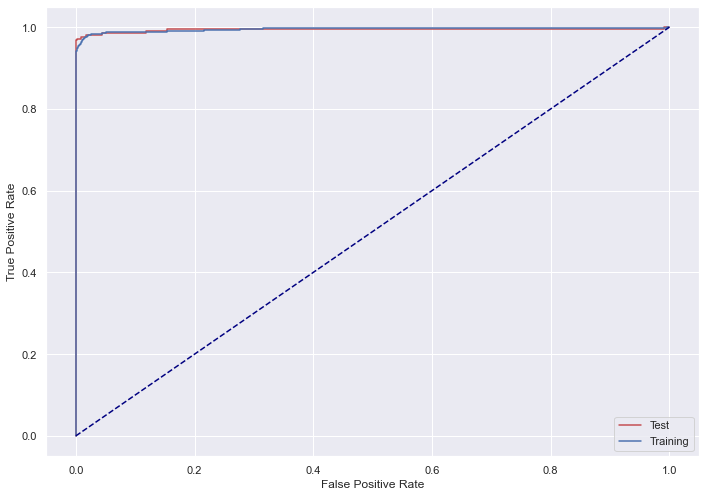

In [38]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=m):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.9938012435612179

#### We got good recall and f1 scores with 97% and 98% respectively. The ROC-AUC curve looks nearly perfect and the precision recall curves are plotted below.

## Regualrization:

In [41]:
# https://github.com/appliedecon/data602-lectures/blob/main/logistic-regression/logistic-regression.ipynb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

def generate_estimates(c):
    num_vars = X.select_dtypes(exclude="object").columns

    num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                               ('standardize_num', StandardScaler())
                            ])

    processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                          ])

    modeling_pipeline = Pipeline([
            ('data_processing', processing_pipeline),
            ('logreg', LogisticRegression(penalty='none'))]
        )

    return modeling_pipeline.fit(X_train, y_train)

lr_data = defaultdict(dict)

cvals = [0.005, 0.01, 0.10, 1.0, 2.0, 5.0, 10]
for cv in cvals:
    m = generate_estimates(c=cv)
    yhat = m.predict_proba(X_test)[:, 1]
    lr_data['coefs'][cv] = m['logreg'].coef_[0]
    lr_data['roc_auc'][cv] = roc_auc_score(y_test, yhat)
    print(classification_report(y_test, y_hat))

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      0.97      0.98       215

    accuracy                           1.00      6319
   macro avg       1.00      0.98      0.99      6319
weighted avg       1.00      1.00      1.00      6319



c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      0.97      0.98       215

    accuracy                           1.00      6319
   macro avg       1.00      0.98      0.99      6319
weighted avg       1.00      1.00      1.00      6319



c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      0.97      0.98       215

    accuracy                           1.00      6319
   macro avg       1.00      0.98      0.99      6319
weighted avg       1.00      1.00      1.00      6319



c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      0.97      0.98       215

    accuracy                           1.00      6319
   macro avg       1.00      0.98      0.99      6319
weighted avg       1.00      1.00      1.00      6319



c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      0.97      0.98       215

    accuracy                           1.00      6319
   macro avg       1.00      0.98      0.99      6319
weighted avg       1.00      1.00      1.00      6319



c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      0.97      0.98       215

    accuracy                           1.00      6319
   macro avg       1.00      0.98      0.99      6319
weighted avg       1.00      1.00      1.00      6319

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      0.97      0.98       215

    accuracy                           1.00      6319
   macro avg       1.00      0.98      0.99      6319
weighted avg       1.00      1.00      1.00      6319



c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


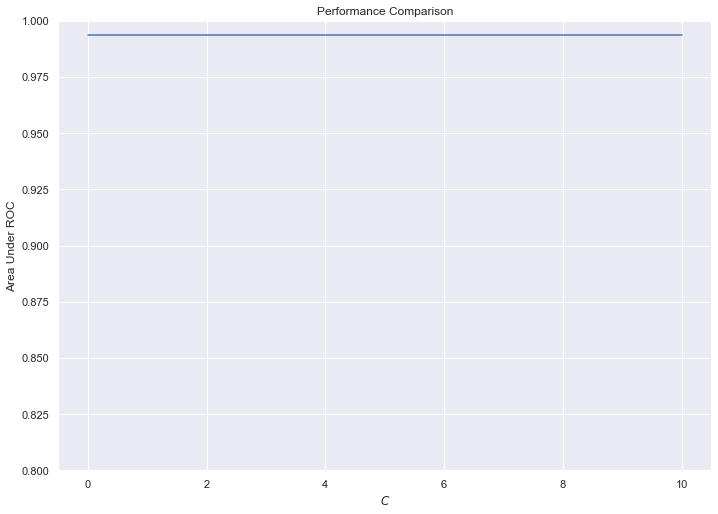

In [42]:
pd.Series(lr_data['roc_auc']).plot()
plt.ylim((0.8,1.0))
plt.xlabel('$C$')
plt.ylabel('Area Under ROC')
plt.title('Performance Comparison')
plt.show()

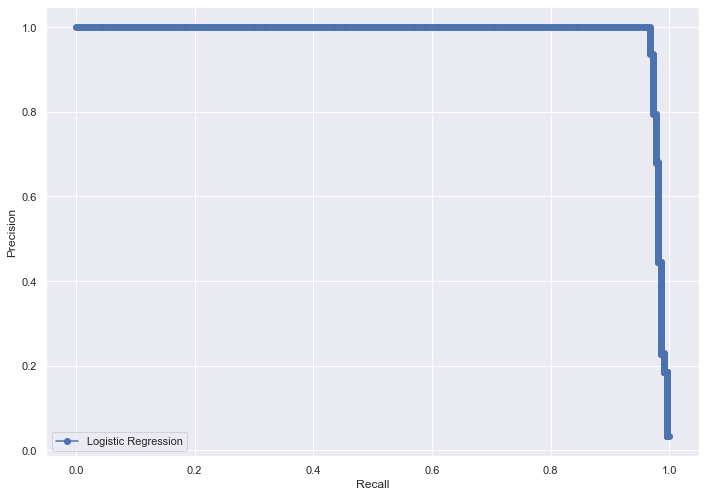

In [58]:
y_testpr_lr = m.predict_proba(X_test)

pr_lr, rec_lr = generate_pr(y_test, y_testpr_lr[:,1])


plt.plot(rec_lr, pr_lr,'-ob')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['Logistic Regression'])
plt.show()

#### Regularization gave similar results, got good recall and f1 scores with 97% and 98% respectively. The ROC-AUC and precision-recall curve looks nearly perfect.

## Decision Trees

In [44]:
# https://github.com/appliedecon/data602-lectures/blob/main/trees/trees.ipynb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier())]
)

param_grid = [
  {'dt__max_depth': [2, 5, 10, 20],
   'dt__min_samples_split':[3, 5, 10, 20],
   'dt__min_samples_leaf': [2, 5],
   'dt__class_weight':['balanced']
  }
 ]

gcv_results = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, scoring='recall', refit=True, cv=3)
gcv_results = gcv_results.fit(X_train, y_train)

gcv_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR',
       'L30', 'L50', 'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'VALUE',
       'VACANCY', 'TENURE', 'NUNITS', 'ROOMS...
       'COST08RELFMRPCT', 'COST08RELFMRCAT', 'COST12RELAMIPCT',
       'COST12RELAMICAT', 'COST12RELPOVPCT', 'COST12RELPOVCAT',
       'COST12RELFMRPCT', 'COST12RELFMRCAT', 'COSTMedRELAMIPCT',
       'COSTMedRELAMICAT', 'COSTMedRELPOVPCT', 'COSTMedRELPOVCAT',
       'COSTMedRELFMRPCT', 'CO

In [45]:
y_testp = gcv_results.predict(X_test)
y_testp_dt = gcv_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6104
           1       0.70      0.98      0.82       215

    accuracy                           0.99      6319
   macro avg       0.85      0.98      0.91      6319
weighted avg       0.99      0.99      0.99      6319



In [46]:
y_testpr_lr = m.predict_proba(X_test)

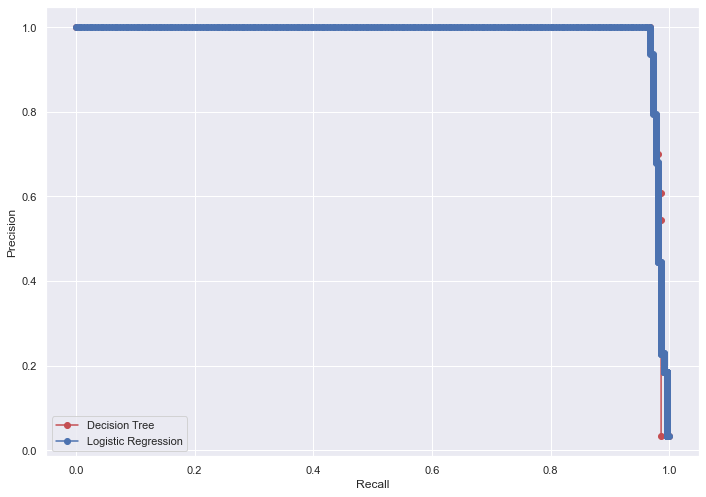

In [47]:
from sklearn.metrics import precision_recall_curve

def generate_pr(y, probs):
    pr, rec, _ = precision_recall_curve(y, probs)
    return pr, rec
    
pr_dt, rec_dt = generate_pr(y_test, y_testp_dt[:,1])
pr_lr, rec_lr = generate_pr(y_test, y_testpr_lr[:,1])

plt.plot(rec_dt, pr_dt,'-or')
plt.plot(rec_lr, pr_lr,'-ob')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['Decision Tree','Logistic Regression'])
plt.show()

#### Decision tree model did not perform as expected and even the majority class could not be predicted with full accuracy. And the precsion of small class was also not that good at 70%.

## Random Forest:

In [48]:
# https://github.com/appliedecon/data602-lectures/blob/main/trees/trees.ipynb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('rf', RandomForestClassifier())]
)

param_grid = [{'rf__max_depth': [5, 8, 10, 12],
               'rf__n_estimators': [10, 50, 100],
               'rf__class_weight': [None, 'balanced', 'balanced_subsample'],
               'rf__max_samples': [1000, 2000, 5000]
              }]

rf_results = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring='recall', refit=True, cv=3)
rf_results = rf_results.fit(X_train, y_train)
rf_yhat = rf_results.predict(X_test)

rf_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR',
       'L30', 'L50', 'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'VALUE',
       'VACANCY', 'TENURE', 'NUNITS', 'ROOMS...
       'COST08RELAMICAT', 'COST08RELPOVPCT', 'COST08RELPOVCAT',
       'COST08RELFMRPCT', 'COST08RELFMRCAT', 'COST12RELAMIPCT',
       'COST12RELAMICAT', 'COST12RELPOVPCT', 'COST12RELPOVCAT',
       'COST12RELFMRPCT', 'COST12RELFMRCAT', 'COSTMedRELAMIPCT',
       'COSTMedRELAMICAT', 'COSTM

In [49]:
y_testp = rf_results.predict(X_test)
y_testp_rf = rf_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      0.97      0.98       215

    accuracy                           1.00      6319
   macro avg       1.00      0.98      0.99      6319
weighted avg       1.00      1.00      1.00      6319



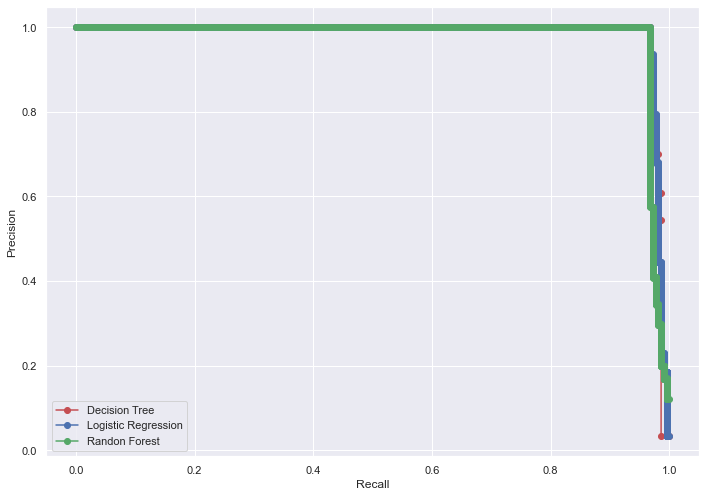

In [50]:
pr_dt, rec_dt = generate_pr(y_test, y_testp_dt[:,1])
pr_lr, rec_lr = generate_pr(y_test, y_testpr_lr[:,1])
pr_rf, rec_rf = generate_pr(y_test, y_testp_rf[:,1])

plt.plot(rec_dt, pr_dt,'-or')
plt.plot(rec_lr, pr_lr,'-ob')
plt.plot(rec_rf, pr_rf,'-og')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['Decision Tree','Logistic Regression', 'Randon Forest'])
plt.show()

#### We got good recall and f1 scores with 97% and 98% respectively. The ROC-AUC and precision-recall curve looks nearly perfect.

## Support Vector:

In [55]:
# https://github.com/appliedecon/data602-lectures/blob/main/supervised-algorithms/knn-nb-svm.ipynb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

svm_m = modeling_pipeline = Pipeline([('data_processing', processing_pipeline),
                                       ('model', SVC(probability=True))])


param_grid = [
  {'model__C': [0.01, 0.1, 1, 10, 100], 'model__kernel': ['linear','rbf']}
 ]

svm_results = GridSearchCV(estimator=svm_m, param_grid=param_grid, scoring='accuracy', refit=True, cv=3)
svm_results = svm_results.fit(X_train, y_train)

svm_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR',
       'L30', 'L50', 'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'VALUE',
       'VACANCY', 'TENURE', 'NUNITS', 'ROOMS...
       'COST08RELAMICAT', 'COST08RELPOVPCT', 'COST08RELPOVCAT',
       'COST08RELFMRPCT', 'COST08RELFMRCAT', 'COST12RELAMIPCT',
       'COST12RELAMICAT', 'COST12RELPOVPCT', 'COST12RELPOVCAT',
       'COST12RELFMRPCT', 'COST12RELFMRCAT', 'COSTMedRELAMIPCT',
       'COSTMedRELAMICAT', 'COSTM

In [56]:
y_testp = svm_results.predict(X_test)
y_testp_svm = svm_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6104
           1       1.00      0.97      0.98       215

    accuracy                           1.00      6319
   macro avg       1.00      0.98      0.99      6319
weighted avg       1.00      1.00      1.00      6319



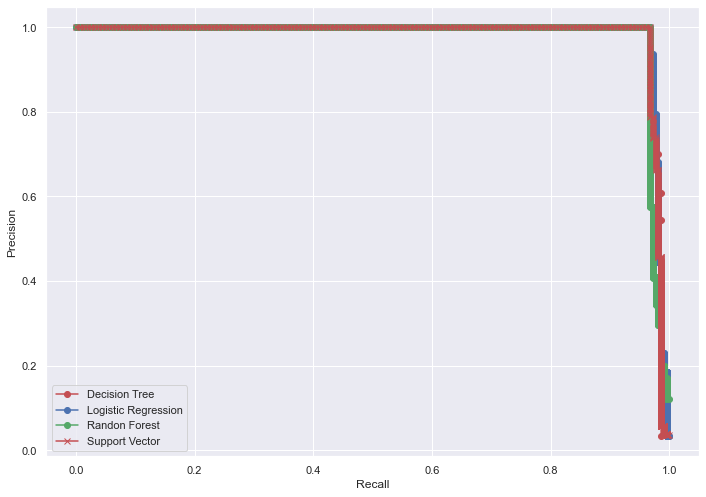

In [60]:
pr_dt, rec_dt = generate_pr(y_test, y_testp_dt[:,1])
pr_lr, rec_lr = generate_pr(y_test, y_testpr_lr[:,1])
pr_rf, rec_rf = generate_pr(y_test, y_testp_rf[:,1])
pr_svm, rec_svm = generate_pr(y_test, y_testp_svm[:,1])

plt.plot(rec_dt, pr_dt,'-or')
plt.plot(rec_lr, pr_lr,'-ob')
plt.plot(rec_rf, pr_rf,'-og')
plt.plot(rec_svm, pr_svm,'-xr')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['Decision Tree','Logistic Regression', 'Randon Forest', 'Support Vector'])
plt.show()

#### We got good recall and f1 scores with 97% and 98% respectively. The ROC-AUC and precision-recall curve looks nearly perfect.

## Conclusion:

There were multiple models which gave out the best results in terms of f1-scores and recall scores, particularly the Logistic Regression with regularization, support vector machine and random forest.

The highest macro avg recall we achieved was 98%.

I would go ahead with the random forest classifier because of the following reasons:
    1. Because of the type of classification we are doing, the nature of random forest classifier relates best.
    2. It gave out amazing results. With 100% precision, 97% recall and 98% f1 score, all macro averages.
    3. It took less time to build the model.
    4. Since this model is ensemble, I have more confidence for less chance of error.

## References:

    https://github.com/appliedecon/data602-lectures/blob/main/regression/linear-regression-and-regularization.ipynb
    
    https://github.com/appliedecon/data602-lectures/blob/main/logistic-regression/logistic-regression.ipynb
    
    https://github.com/appliedecon/data602-lectures/blob/main/trees/trees.ipynb
    
    https://github.com/appliedecon/data602-lectures/blob/main/supervised-algorithms/knn-nb-svm.ipynb